In [1]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import rcParams
import time
from copy import copy

#from sim_handling import Simulation,loadSim #uses ds7
from sim_handling2 import Simulation,loadSim #ds8: faster, more space efficient
from diffusionstuff8 import f0d,f1d,f2d, getsigmastep_2d
from matplotlib.animation import PillowWriter

C:\Users\Max-PC\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\llvmlite\llvmpy\__init__.py:3: UserWarning: The module `llvmlite.llvmpy` is deprecated and will be removed in the future.
  warnings.warn(
C:\Users\Max-PC\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\llvmlite\llvmpy\core.py:8: UserWarning: The module `llvmlite.llvmpy.core` is deprecated and will be removed in the future. Equivalent functionality is provided by `llvmlite.ir`.
  warnings.warn(
C:\Users\Max-PC\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\llvmlite\llvmpy\passes.py:17: UserWarning: The module `llvmlite.llvmpy.passes` is deprecated and will be removed in the future. If you are using this code, it should be inlined into your own project.
  warnings.warn(


In [2]:
%matplotlib widget

#set figsize to be big (12,12) inches
#rcParams['figure.figsize'] = 10,10

assymettric 2d growth

In [3]:
#set up and run and plot a new simulation
sim_box = (50,50)

test_2d_asym = Simulation(f2d, sim_box, method='RK45')

#try a noisy simulation
test_2d_asym.noisy_init = False

test_2d_asym.float_params['DoverdeltaX2'] *= 2 
test_2d_asym.layermax = 250
#test_2d_asym.sigmastepmax= -0.01 #ablation
test_2d_asym.sigmastepmax= 0.20 #growth
test_2d_asym.center_reduction = 0.1
test_2d_asym.deltaT *= 10 #increase time step to decrease number of steps saved

In [4]:
#plan:
# simulate over 250 layers growth, save number of layers over time,
# plot against the  size of box (x axis is)
# y axis is time,
# z axis is number of layers grown

#create 1d sim 
# ss_1d = Simulation(f1d, (test_2d_asym.shape[0],), method=test_2d_asym.method, rtol=test_2d_asym.rtol)
# ss_1d.float_params['DoverdeltaX2'] = test_2d_asym.float_params['DoverdeltaX2'] 
# ss_1d.layermax = test_2d_asym.layermax * 1.5 #make sure it reaches steady state
# ss_1d.sigmastepmax = test_2d_asym.sigmastepmax 
# ss_1d.sigma0 = test_2d_asym.sigma0
# ss_1d.center_reduction = test_2d_asym.center_reduction
# ss_1d.deltaT = test_2d_asym.deltaT #increase time step to decrease number of steps saved?
# ss_1d.noisy_init = test_2d_asym.noisy_init

#maxes = np.array([np.max(n) for n in Ntot[:]])
#mins = np.array([np.min(n) for n in Ntot[:]])
sim_box_sizes = np.arange(sim_box[0],sim_box[0]*6,25)
zs = []
for size in sim_box_sizes:
    # new sim and params
    ss_1d = Simulation(f1d, (int(size),), method=test_2d_asym.method, rtol=test_2d_asym.rtol)
    ss_1d.float_params['DoverdeltaX2'] = test_2d_asym.float_params['DoverdeltaX2'] 
    ss_1d.layermax = test_2d_asym.layermax * 1.5 #make sure it reaches steady state
    ss_1d.sigmastepmax = test_2d_asym.sigmastepmax 
    ss_1d.sigma0 = test_2d_asym.sigma0
    ss_1d.center_reduction = test_2d_asym.center_reduction
    ss_1d.deltaT = test_2d_asym.deltaT #increase time step to decrease number of steps saved?
    ss_1d.noisy_init = test_2d_asym.noisy_init
    
    print(ss_1d.dimension)
    ss_1d.run()
    Ntot = ss_1d.getNtot() #get number of steps over time #(z)
    print('Ntot.shape: ', Ntot.shape)
    z = [np.max(n)-np.min(n) for n in Ntot[:]]
    zs.append(z)


1
breaking because reached max number of layers grown
Ntot.shape:  (1140, 50)
1


KeyboardInterrupt: 

IndexError: list index out of range

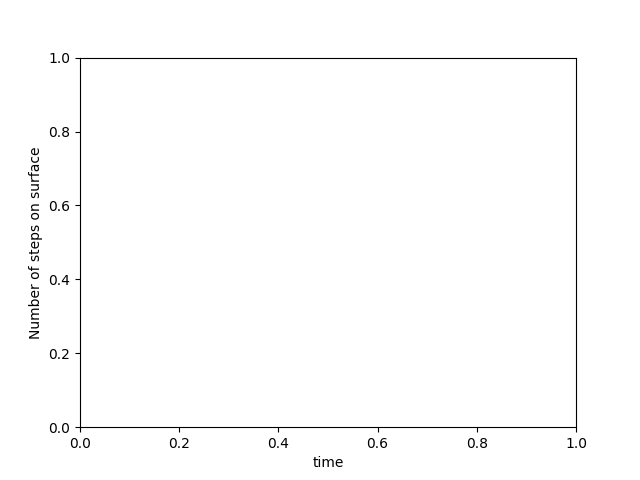

In [5]:
#graph number of steps over time

plt.figure()
ax = plt.subplot(111)

plt.xlabel('time')
plt.ylabel('Number of steps on surface')

ax.plot(zs[9])
plt.grid()

In [ ]:
#analyze results
#y = time axis
ys,xs = np.meshgrid(sim_box_sizes,zs[9])
print(len(sim_box_sizes))
#zs = np.asarray(zs).reshape((len(zs[0]),len(zs)))

print('xs.shape: ', xs.shape)
print('ys.shape: ', ys.shape)
print('shape of zs: ', zs.shape)
print('types of zs: ', list(map(type,zs)))
print('lens of zs: ', list(map(len,zs)))

#print('zs: ', zs)
#3d surface graph
plt.figure()
ax = plt.axes(projection='3d')

ax.set_xlabel('Box size')
ax.set_ylabel('Time')
ax.set_zlabel('Number of steps on surface')
#ax.zlim(maxes-mins)

ax.plot_surface(xs,ys,zs)
#ax.plot(Ntot[:,0],maxes-mins)
#plt.grid()

1D model for comparison (uses same parameters as above 2d model), graphing if it also reaching steady state

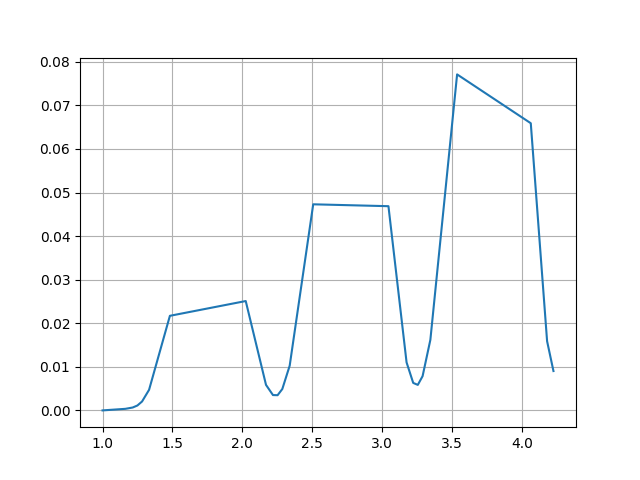

In [6]:
#print number of steps over time
Ntot = ss_1d.getNtot()

maxes = np.array([np.max(n) for n in Ntot[:]])
mins = np.array([np.min(n) for n in Ntot[:]])

#print(maxes,mins)
plt.figure()
ax = plt.subplot(111)

#ax.plot(test_f2d_sim.results()['t'],maxes-mins)
ax.plot(Ntot[:,0],maxes-mins)
plt.grid()

In [ ]:
#plot 
#cmpltion = 0.005 
cmpltion = 0.1

#for cmpltion in map(lambda x: x*3,[0,0.001,0.005]): # making plots of initial noise dissipating
ss_1d.plot(completion=cmpltion, ice=True, figurename=my_filename+'_completion'+str(cmpltion))
plt.savefig(my_filename+'_completion'+str(cmpltion)+'.png')
plt.close()


In [ ]:
#test_2d_asym.save(id=['asymmetric'+str(test_2d_asym.shape[0])+'_'+str(test_2d_asym.shape[1]),str(test_2d_asym.layermax)+'layers'])
#symm = Simulation(f2d,(500,500),rtol=1e-12)

In [ ]:
#countour plot of sigmastep 2d
plt.figure()
ax = plt.axes(projection='3d')
plt.xlabel(r'x ($\mu m$)')
plt.ylabel(r'y ($\mu m$)')
#ax.set_zlabel('Layers of ice')
#levels = np.arange(19,21,0.1)
ax.contourf(xgrid,ygrid, sigma*100, extent=(0, 2, 0, 2), cmap='YlGnBu_r', vmin=0, vmax=200, zorder=1)#, levels=levels)

In [ ]:
#countour plot of sigmastep 2d
print(xs.shape,ys.shape,sigma.shape)
fig,ax = plt.subplots()
CS = ax.contourf(xs.T,ys.T,sigma*100)
ax.set_xlabel(r'$x (\mu m)$', fontsize=20)
ax.set_ylabel(r'$y (\mu m)$', fontsize=20)
plt.grid(True)
plt.gca().set_aspect('equal')
fig.colorbar(CS)
plt.title('%supersaturation (getsigmastep_2d)')

2D Growth simulation

In [7]:
#create the 2d sim
test_f2d_sim = Simulation(f2d, (250,250), rtol=1e-12)
test_f2d_sim.layermax = 50#0
#test_f2d_sim.run()
#test_f2d_sim.save(_id=['test','50layer'])

In [8]:
#animate the 2d sim
test_f2d_sim.animate(crossSection=True)

C:\Users\Max-PC\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\scipy\integrate\_ode.py:1350: UserWarning: lsoda: Illegal input detected (internal error).
  warnings.warn('{:s}: {:s}'.format(self.__class__.__name__,


ValueError: need at least one array to concatenate

In [ ]:
#print variables in 1d simulation for comparison to literature
for k,v in test_f2d_sim._extra_vars.items():
    print(k,v)
print('center reduction %: ', test_f2d_sim.center_reduction)

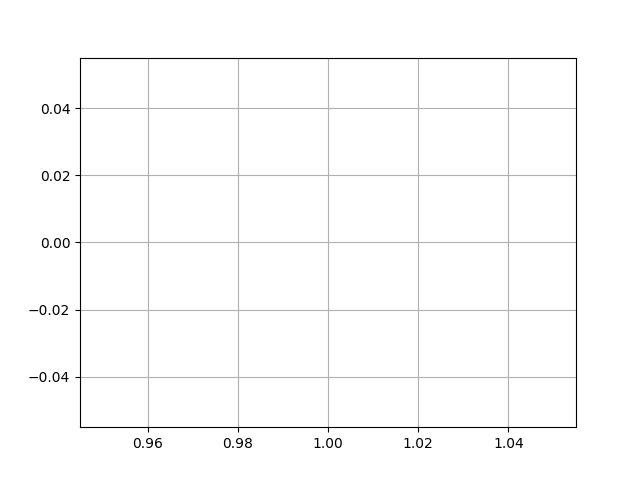

In [9]:
#print number of steps over time
Ntot = test_f2d_sim.getNtot()

maxes = np.array([np.max(n) for n in Ntot[:]])
mins = np.array([np.min(n) for n in Ntot[:]])

#print(maxes,mins)
plt.figure()
ax = plt.subplot(111)

#ax.plot(test_f2d_sim.results()['t'],maxes-mins)
ax.plot(Ntot[:,0,0],maxes-mins)
#ax.plot(test_f2d_sim.results()['t'],test_f2d_sim.results()['t'])
plt.grid()

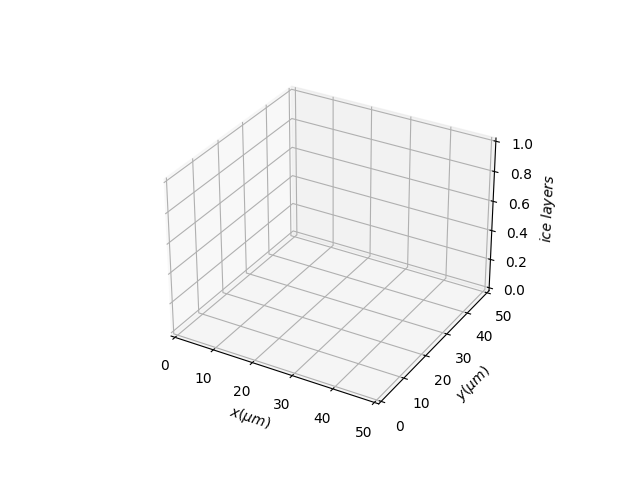

In [10]:
#animate test_f2d_sim

test_f2d_sim.animate(ice=True)

In [ ]:
#test_f2d_sim = loadSim('f2d_simulation_test_50layer.pkl') 

In [11]:
#graph results normalized to minimum of ice surface
Fliq_ss, Ntot_steadystate = test_f2d_sim.normalize_results_to_min()
nice_ss = Ntot_steadystate-Fliq_ss
print(np.shape(Ntot_steadystate))
xs, ys = np.meshgrid(test_f2d_sim.x, test_f2d_sim.y)

fig = plt.figure(figsize=(12,12))
ax = plt.axes(projection = '3d')
#ax.plot_surface(test_f2d_sim._results['t'], Ntot_steadystate[:,])
ax.set_xlabel(r'$x (\mu m$)')#,fontsize=fontsize)
ax.set_ylabel(r'$y (\mu m$)')#,fontsize=fontsize)
ax.set_zlabel(r'$ice \ layers$')#,fontsize=fontsize)
#limits
#ax.set_zlim3d(-self.layermax, self.layermax)
#ax.set_ylim(0, max(self.y))
#ax.set_xlim(0, max(self.x))
def update_fig(num):
    ax.clear() # remove last iteration of plot 
    plot_func = ax.plot_surface
    # if crossSection:
    #     xmid = round(np.shape(Nice)[0]/2)
    #     if ice:
    #         plot_func(X=xs[xmid:], Y=ys[xmid:], Z=nice_ss[num][xmid:][:],cmap ='viridis')# cmap='viridis')#, vmin=0, vmax=200) #plot half of the surface of the ice
    #     if tot:
    #         plot_func(X=xs[xmid:], Y=ys[xmid:], Z=Ntot_steadystate[num][xmid:][:], cmap='cividis')#, vmin=0, vmax=200) #plot half the surface of the QLL
    # else:
    #     if ice:
    plot_func(X=xs, Y=ys, Z=nice_ss[num], cmap='viridis')#, vmin=0, vmax=200) #plot the surface of the ice 
        # if tot:
    # plot_func(X=xs, Y=ys, Z=Ntot_steadystate[num], cmap='YlGnBu_r')#, vmin=0, vmax=200)#plot the surface of the QLL
    pass


num_steps = len(test_f2d_sim._results['t'])
import matplotlib.animation as animation
ani = animation.FuncAnimation(fig , update_fig, num_steps, interval=50, blit=False, cache_frame_data=False, repeat = True)
plt.show()

ValueError: too many values to unpack (expected 2)

In [12]:
#graph difference in steps over time: should converge to zero if steady state is reached
Fliq_ss, Ntot_steadystate = test_f2d_sim.steady_state_calc()
nice_ss = Ntot_steadystate-Fliq_ss
print(np.shape(Ntot_steadystate))
xs, ys = np.meshgrid(test_f2d_sim.x, test_f2d_sim.y)

fig = plt.figure(figsize=(12,12))
ax = plt.axes(projection = '3d')
#ax.plot_surface(test_f2d_sim._results['t'], Ntot_steadystate[:,])
ax.set_xlabel(r'$x (\mu m$)')#,fontsize=fontsize)
ax.set_ylabel(r'$y (\mu m$)')#,fontsize=fontsize)
ax.set_zlabel(r'$ice \ layers$')#,fontsize=fontsize)
#limits
#ax.set_zlim3d(-self.layermax, self.layermax)
#ax.set_ylim(0, max(self.y))
#ax.set_xlim(0, max(self.x))
def update_fig(num):
    ax.clear() # remove last iteration of plot 
    plot_func = ax.plot_surface
    # if crossSection:
    #     xmid = round(np.shape(Nice)[0]/2)
    #     if ice:
    #         plot_func(X=xs[xmid:], Y=ys[xmid:], Z=nice_ss[num][xmid:][:],cmap ='viridis')# cmap='viridis')#, vmin=0, vmax=200) #plot half of the surface of the ice
    #     if tot:
    #         plot_func(X=xs[xmid:], Y=ys[xmid:], Z=Ntot_steadystate[num][xmid:][:], cmap='cividis')#, vmin=0, vmax=200) #plot half the surface of the QLL
    # else:
    #     if ice:
    plot_func(X=xs, Y=ys, Z=nice_ss[num], cmap='viridis')#, vmin=0, vmax=200) #plot the surface of the ice 
        # if tot:
    # plot_func(X=xs, Y=ys, Z=Ntot_steadystate[num], cmap='YlGnBu_r')#, vmin=0, vmax=200)#plot the surface of the QLL
    pass


num_steps = len(test_f2d_sim._results['t'])
import matplotlib.animation as animation
ani = animation.FuncAnimation(fig , update_fig, num_steps, interval=50, blit=False, cache_frame_data=False, repeat = True)
plt.show()

ValueError: too many values to unpack (expected 2)

In [13]:
test_2d_sim = Simulation(f2d, (500,500), rtol=1e-12)
test_2d_sim.layermax = 2
#test_2d_sim = loadSim('f2d_simulation_august13.pkl')
_plot = test_2d_sim.plot()

MemoryError: Unable to allocate 466. GiB for an array with shape (62502250022,) and data type float64

1d simulation 

In [ ]:
test_2d_sim.save(id=['august13'])

In [ ]:
fig = plt.figure()
ax = plt.axes(projection='3d')
num_steps = len(test_2d_sim.results()['t'])
xs,ys = np.meshgrid(test_2d_sim.x, test_2d_sim.y)
ax.plot_surface(X=xs, Y=ys, Z=test_2d_sim.getNtot()[num_steps-1], cmap='viridis')

In [ ]:
test_1d = Simulation(f1d, shape=(500,), rtol=1e-12)
test_1d.layermax = 500
test_1d.results()

In [ ]:
#test_1d.animate(ice=True, tot=True)
test_1d.plot()

2d Idea: increase sigmastepmax to see if faceted growth occur, removing the concave "bowl" forming at the center of initially tested 2d systems (test_f2d_sim)

In [ ]:
# sigma_test = Simulation(f2d, (500,500),rtol = 1e-12)
# sigma_test.layermax = 100
# sigma_test.sigmastepmax = 0.25
# sigma_test.results()

In [ ]:
#sigma_id = ['sigmastepmax_'+str(round(100*sigma_test.sigmastepmax)), str(sigma_test.layermax)+'layers']
#sigma_test.save(id=sigma_id)

#test increased layers with increased sigmastep

#sigma_test = loadSim('f2d_simulation_sigmastepmax_025.pkl') # 20 layers?
#sigma_test = loadSim('f2d_simulation_sigmastepmax_025_50layers.pkl')
sigma_test = loadSim('f2d_simulation_sigmastepmax_25_100layers.pkl')

In [ ]:
sigma_test.animate()

2d Ablation testing

In [ ]:
f2d_ablate = Simulation(f2d, (500,500), rtol=1e-12)
f2d_ablate.sigmastepmax = -0.1
f2d_ablate.layermax = 50
f2d_ablate.animate()

1d growth testing. Works, however does not currently match the literature graph despite using the same parameters.

In [ ]:
f1d_sim = Simulation(f1d, (500,), rtol=1e-12)

In [ ]:
#change parameters to match Gladich et al paper's graph and run simulation
f1d_sim.layermax = 500#10000
#f1d_sim.center_reduction = 0.25 #is default now

In [ ]:
f1d_sim.run()

In [ ]:
fig = f1d_sim.plot(completion=0.99, ice=True, tot=True)

In [ ]:
#print variables in 1d simulation for comparison to literature
for k,v in f1d_sim._extra_vars.items():
    print(k,v)
print('center reduction %: ', f1d_sim.center_reduction)

In [ ]:
#functions tested so far
#test_f2d_sim.countermax_0D
#test_f2d_sim.countermax_1D
#test_f2d_sim.countermax_2D
#test_f2d_sim.atol
#test_f2d_sim.rtol
#test_f2d_sim.deltaT
#test_f2d_sim.float_params
#test_f2d_sim.animate()
#test_f2d_sim.run()
#test_f2d_sim.steady_state_calc()
#test_f2d_sim.plot()
#test_f2d_sim.save()
#test_f2d_sim.load() #WORKS to load simulation from file if simulation object exists already -- for loading straght froom file use loadSim()
#loadSim() #works



In [ ]:
num_steps = len(test_f2d_sim.results()['t'])
#shape of results is (num_steps, 2, nx, ny)
Fliq, Ntot = [],[]
for step in range(num_steps):
    next_Fliq, next_Ntot = test_f2d_sim._results['y'][step]
    Fliq.append(next_Fliq)
    Ntot.append(next_Ntot)    
Fliq,Ntot = np.array(Fliq), np.array(Ntot)
Nice = Ntot - Fliq
#shape of fliq, ntot and nice should be (num_steps, nx, ny)

#access coordinate arrays for plotting
xs, ys = np.meshgrid(test_f2d_sim.x, test_f2d_sim.y)

In [ ]:
print(num_steps)
print(test_f2d_sim.steepness(0,slice(0,test_f2d_sim.shape[0]//2)))

In [ ]:
print(test_f2d_sim.get_step_density(0,slice(0,test_f2d_sim.shape[0]//2)))  